In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.concat([pd.read_csv(f'E:/Vlad/pythonProject/dds_ch2_nyt/nyt{i}.csv') for i in range(1, 32)], ignore_index=True)

Завантажуємо та виводимо новостворений Дата Фрейм.

In [3]:
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
14905860,41,1,4,0,1
14905861,0,0,5,0,0
14905862,22,1,3,0,1
14905863,59,0,5,1,1


Розбиваємо записи в датафреймі на вікові підгрупи (<18, 18-24, 25-34, 35-44, 45-54, 55-64, 65+)

In [4]:
bins = [0, 18, 25, 35, 45, 55, 65, data['Age'].max()]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

Виводимо неавторизованих користувачів для визначення кількості записів з невизначеною віковою групою.

In [5]:
data[data['age_group'].isna()]

,Age,Gender,Impressions,Clicks,Signed_In,age_group
6,0,0,7,1,0,NaN
10,0,0,8,1,0,NaN
12,0,0,4,0,0,NaN
15,0,0,6,0,0,NaN
19,0,0,5,0,0,NaN
...,...,...,...,...,...,...
14905839,0,0,5,0,0,NaN
14905843,0,0,6,0,0,NaN
14905848,0,0,4,0,0,NaN
14905856,0,0,4,0,0,NaN


Створюємо новий датафрейм без записів користувачів з невизначеною віковою групою.

In [6]:
data_without_nan = data.dropna(subset=['age_group'])

In [7]:
data_without_nan

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
14905859,18,0,4,0,1,<18
14905860,41,1,4,0,1,35-44
14905862,22,1,3,0,1,18-24
14905863,59,0,5,1,1,55-64


Обчислюємо CTR для кожного запису за формулою: CTR = CLICKS / IMPRESSION

In [31]:
data_without_nan['CTR'] = data_without_nan['Clicks'] / data_without_nan['Impressions']

C:\Users\t-1000\AppData\Local\Temp\ipykernel_14556\1296314814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_nan['CTR'] = data_without_nan['Clicks'] / data_without_nan['Impressions']


In [9]:
data_without_nan

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,65+,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0
...,...,...,...,...,...,...,...
14905859,18,0,4,0,1,<18,0.0
14905860,41,1,4,0,1,35-44,0.0
14905862,22,1,3,0,1,18-24,0.0
14905863,59,0,5,1,1,55-64,0.2


Розрахуємо середнє значення показів для кожної групи.

In [10]:
average_impressions = data_without_nan.groupby('age_group')['Impressions'].mean()
average_impressions

age_group
<18      5.006339
18-24    4.999208
25-34    4.996663
35-44    4.997689
45-54    4.997300
55-64    4.997511
65+      5.002381
Name: Impressions, dtype: float64

Візуалізуємо результат у вигляді графіку.

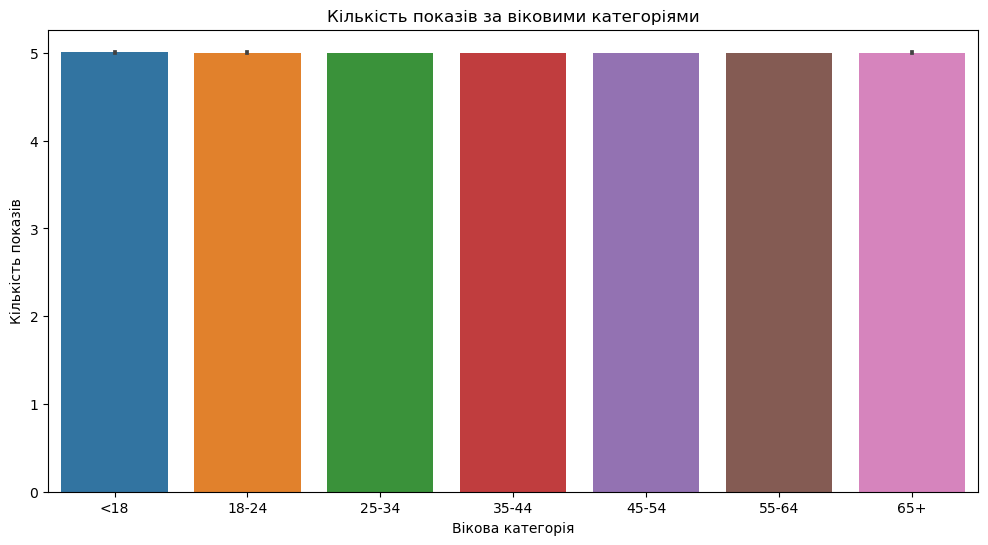

In [11]:
plt.figure(figsize=(12, 6))
sb.barplot(x='age_group', y='Impressions', data=data_without_nan)
plt.title('Кількість показів за віковими категоріями')
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість показів')



plt.show()

Як бачимо, у середньому кожній віковій групі показують майже однакову кількість рекламних об'яв, що свідчить про рівномірне покриття усіх можливих користувацьких груп.

Розрахуємо показник переходів для визначених груп.

In [12]:
average_ctr = data_without_nan.groupby('age_group')['CTR'].mean()
average_ctr

age_group
<18      0.026531
18-24    0.009990
25-34    0.010045
35-44    0.010007
45-54    0.010442
55-64    0.020335
65+      0.030008
Name: CTR, dtype: float64

Візуалізуємо результат за допомогою графіків:

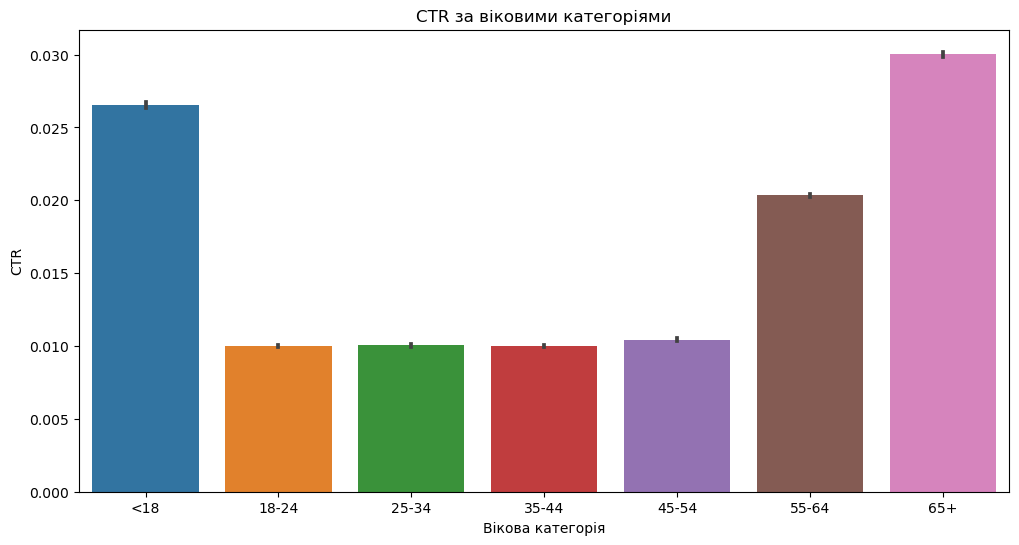

In [13]:
plt.figure(figsize=(12, 6))
sb.barplot(x='age_group', y='CTR', data=data_without_nan)
plt.title('CTR за віковими категоріями')
plt.xlabel('Вікова категорія')
plt.ylabel('CTR')
plt.show()

Як бачимо користувачі молодші 18 років та користувачі старші за 65 переходять за посиланням більше, а ніж усі інші вікові групи. Можемо дійти висновку, що дані групи потребують більшої уваги та збільшенні таргетації реклами для них (можливе збільшення кількості показів).

Дослідимо кількість показів для чоловіків та жінок старших за 18 років. Для порівняння використаємо графіки

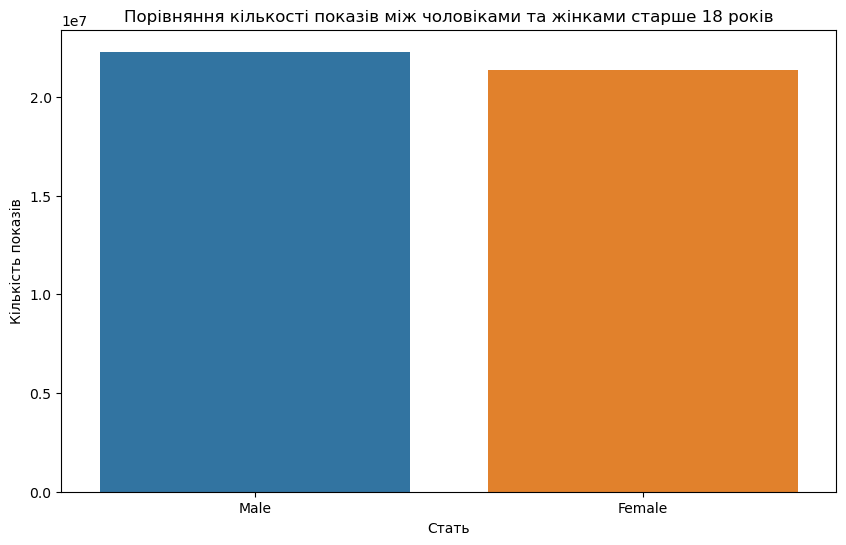

In [14]:
male_above_18 = data_without_nan[(data_without_nan['Gender'] == 1) & (data_without_nan['Age'] > 18)]
female_above_18 = data_without_nan[(data_without_nan['Gender'] == 0) & (data_without_nan['Age'] > 18)]

plt.figure(figsize=(10, 6))
sb.barplot(x=['Male', 'Female'], y=[male_above_18['Impressions'].sum(), female_above_18['Impressions'].sum()])
plt.title('Порівняння кількості показів між чоловіками та жінками старше 18 років')
plt.xlabel('Стать')
plt.ylabel('Кількість показів')
plt.show()

В результаті візуалізації можемо дійти висновку, що покази реклами більш менш рівномірно покривають не тільки вікові групи, а ще й відповідно покривають чоловічу та жіночі статі. Хоча й на графіку здається, що кількість показів майже рівна, проте кількість показів у чоловіків на сотні тисяч одиниці більша.

Дослідимо дані кількості переходів за авторизованими та анонімними користувачами. Візуалізуємо результат.

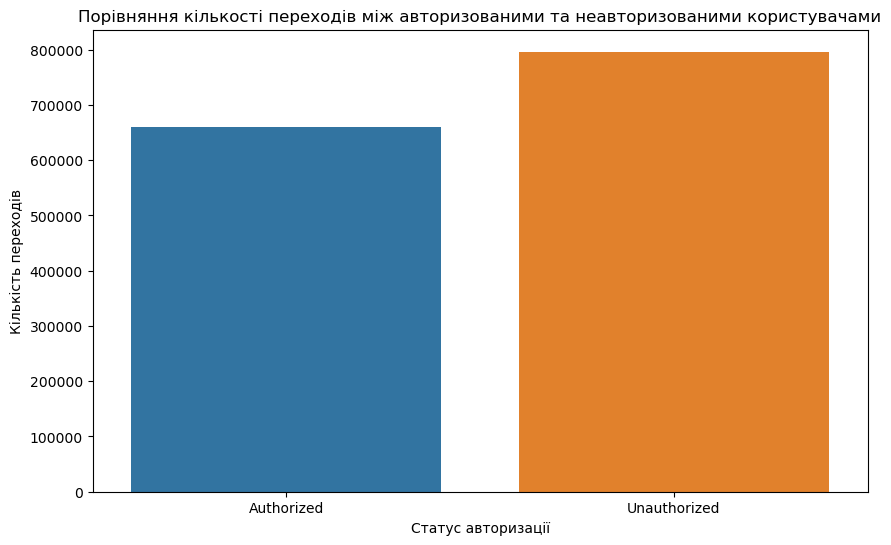

In [15]:
authorized_users = data[data['Signed_In'] == 1]
unauthorized_users = data[data['Signed_In'] == 0]

plt.figure(figsize=(10, 6))
sb.barplot(x=['Authorized', 'Unauthorized'], y=[authorized_users['Clicks'].sum(), unauthorized_users['Clicks'].sum()])
plt.title('Порівняння кількості переходів між авторизованими та неавторизованими користувачами')
plt.xlabel('Статус авторизації')
plt.ylabel('Кількість переходів')
plt.show()

В результаті можемо побачити, що користувачі, які не є неавторизованими більш прихильно переходять за посиланням, що свідчить про недостатню залученість даних користувачів до ресурсу.

Розрахуємо квантилі для кожної вікової групи (25%, 50%, 75%) для значень Переходів та Показів. Окрім цього визначимо значення для користувачів за типом авторизації

In [16]:
quantiles_by_age_group = data_without_nan.groupby('age_group').agg(
    Impressions_25_quantile=('Impressions', lambda x: x.quantile(0.25)),
    Impressions_50_quantile=('Impressions', lambda x: x.quantile(0.5)),
    Impressions_75_quantile=('Impressions', lambda x: x.quantile(0.75)),
    Clicks_25_quantile=('Clicks', lambda x: x.quantile(0.25)),
    Clicks_50_quantile=('Clicks', lambda x: x.quantile(0.5)),
    Clicks_75_quantile=('Clicks', lambda x: x.quantile(0.75))
)
quantiles_by_auth = data.groupby('Signed_In').agg(
    Impressions_25_quantile=('Impressions', lambda x: x.quantile(0.25)),
    Impressions_50_quantile=('Impressions', lambda x: x.quantile(0.5)),
    Impressions_75_quantile=('Impressions', lambda x: x.quantile(0.75)),
    Clicks_25_quantile=('Clicks', lambda x: x.quantile(0.25)),
    Clicks_50th_quantile=('Clicks', lambda x: x.quantile(0.5)),
    Clicks_75th_quantile=('Clicks', lambda x: x.quantile(0.75))
)

In [17]:
quantiles_by_age_group

,Impressions_25_quantile,Impressions_50_quantile,Impressions_75_quantile,Clicks_25_quantile,Clicks_50_quantile,Clicks_75_quantile
age_group,,,,,,
<18,3.0,5.0,6.0,0.0,0.0,0.0
18-24,3.0,5.0,6.0,0.0,0.0,0.0
25-34,3.0,5.0,6.0,0.0,0.0,0.0
35-44,3.0,5.0,6.0,0.0,0.0,0.0
45-54,3.0,5.0,6.0,0.0,0.0,0.0
55-64,3.0,5.0,6.0,0.0,0.0,0.0
65+,3.0,5.0,6.0,0.0,0.0,0.0


Як бачимо для всіх вікових груп значення квантелів однакові, що може вказувати на однорідний розподіл даних без великих розбіжностей між різними віковими групами

Розрахуємо середнє значення для кожної вікової групи за Переходами та Показами. Окрім цього визначимо значення для користувачів за типом авторизації 

In [18]:
mean_by_age_group = data_without_nan.groupby('age_group').agg(
    Impressions_mean=('Impressions', 'mean'),
    Clicks_mean=('Clicks', 'mean')
)
mean_by_auth = data.groupby('Signed_In').agg(
    Impressions_mean=('Impressions', 'mean'),
    Clicks_mean=('Clicks', 'mean')
)

In [19]:
mean_by_age_group

,Impressions_mean,Clicks_mean
age_group,,
<18,5.006339,0.133168
18-24,4.999208,0.049990
25-34,4.996663,0.050101
35-44,4.997689,0.050035
45-54,4.997300,0.052157
55-64,4.997511,0.101410
65+,5.002381,0.150174


Знайдемо значення медіани для кожної вікової групи за Переходами та Показами. Окрім цього визначимо значення для користувачів за типом авторизації 

In [20]:
median_by_age_group = data_without_nan.groupby('age_group').agg(
    Impressions_median=('Impressions', 'median'),
    Clicks_median=('Clicks', 'median')
)
median_by_auth = data.groupby('Signed_In').agg(
    Impressions_median=('Impressions', 'median'),
    Clicks_median=('Clicks', 'median')
)

In [21]:
median_by_age_group

,Impressions_median,Clicks_median
age_group,,
<18,5.0,0.0
18-24,5.0,0.0
25-34,5.0,0.0
35-44,5.0,0.0
45-54,5.0,0.0
55-64,5.0,0.0
65+,5.0,0.0


Як бачимо, для усіх груп медіальне значення рівне за Показами та переходами й дорівнює 5 та 0 відповідно.

Знайдемо значення дисперсії для кожної вікової групи за Переходами та Показами. Окрім цього визначимо значення для користувачів за типом авторизації 

In [22]:
variance_by_age_group = data_without_nan.groupby('age_group').agg(
    Impressions_variance=('Impressions', 'var'),
    Clicks_variance=('Clicks', 'var')
)
variance_by_auth = data.groupby('Signed_In').agg(
    Impressions_variance=('Impressions', 'var'),
    Clicks_variance=('Clicks', 'var')
)

In [23]:
variance_by_age_group

,Impressions_variance,Clicks_variance
age_group,,
<18,5.019357,0.134620
18-24,5.003437,0.050120
25-34,4.997274,0.050079
35-44,4.991887,0.049971
45-54,4.992517,0.052357
55-64,4.995185,0.101456
65+,4.983012,0.149828


Значення дисперсії досить подібні до відповідних середніх значень, що може свідчити про те, що дані мають відносно низьку варіабельність і зазвичай зосереджені доволі близько до середнього значення. 
Значення дисперсії для кількості показів (Impressions) вказують на те, що кількість показів в кожній віковій групі майже однаково розподілена навколо середнього значення. Це означає, що великі відхилення від середнього значення є рідкісними, і дані не мають великих викидів. Кількість показів досить стабільна в межах кожної вікової групи.
Значення дисперсії для кількості переходів (Clicks) також вказують на низьку варіабельність в кожній віковій групі. Кількість переходів майже однаково розподілена навколо середнього значення, і великі відхилення від середнього є рідкісними.

Знайдемо максимальне значення Переходів та Показів для кожної вікової групи. Окрім цього визначимо значення для користувачів за типом авторизації 

In [24]:
max_by_age_group = data.groupby('age_group').agg(
    Impressions_max=('Impressions', 'max'),
    Clicks_max=('Clicks', 'max')
)
max_by_auth = data.groupby('Signed_In').agg(
    Impressions_max=('Impressions', 'max'),
    Clicks_max=('Clicks', 'max')
)

In [25]:
max_by_age_group

,Impressions_max,Clicks_max
age_group,,
<18,19,4
18-24,20,4
25-34,19,3
35-44,20,4
45-54,20,4
55-64,20,4
65+,19,4


Додамо визначену інформацію до датафреймів для зручності обробки:

In [28]:
result_data_by_age_group = pd.concat([
    quantiles_by_age_group, 
    mean_by_age_group, 
    median_by_age_group, 
    variance_by_age_group, 
    max_by_age_group 
], axis=1)

result_data_by_auth = pd.concat([
    quantiles_by_auth,
    mean_by_auth,
    median_by_auth,
    variance_by_auth,
    max_by_auth
], axis=1)

In [29]:
result_data_by_age_group

,Impressions_25_quantile,Impressions_50_quantile,Impressions_75_quantile,Clicks_25_quantile,Clicks_50_quantile,Clicks_75_quantile,Impressions_mean,Clicks_mean,Impressions_median,Clicks_median,Impressions_variance,Clicks_variance,Impressions_max,Clicks_max
age_group,,,,,,,,,,,,,,
<18,3.0,5.0,6.0,0.0,0.0,0.0,5.006339,0.133168,5.0,0.0,5.019357,0.134620,19,4
18-24,3.0,5.0,6.0,0.0,0.0,0.0,4.999208,0.049990,5.0,0.0,5.003437,0.050120,20,4
25-34,3.0,5.0,6.0,0.0,0.0,0.0,4.996663,0.050101,5.0,0.0,4.997274,0.050079,19,3
35-44,3.0,5.0,6.0,0.0,0.0,0.0,4.997689,0.050035,5.0,0.0,4.991887,0.049971,20,4
45-54,3.0,5.0,6.0,0.0,0.0,0.0,4.997300,0.052157,5.0,0.0,4.992517,0.052357,20,4
55-64,3.0,5.0,6.0,0.0,0.0,0.0,4.997511,0.101410,5.0,0.0,4.995185,0.101456,20,4
65+,3.0,5.0,6.0,0.0,0.0,0.0,5.002381,0.150174,5.0,0.0,4.983012,0.149828,19,4


In [30]:
result_data_by_auth

,Impressions_25_quantile,Impressions_50_quantile,Impressions_75_quantile,Clicks_25_quantile,Clicks_50th_quantile,Clicks_75th_quantile,Impressions_mean,Clicks_mean,Impressions_median,Clicks_median,Impressions_variance,Clicks_variance,Impressions_max,Clicks_max
Signed_In,,,,,,,,,,,,,,
0,3.0,5.0,6.0,0.0,0.0,0.0,5.001178,0.141878,5.0,0.0,5.003981,0.147301,21,6
1,3.0,5.0,6.0,0.0,0.0,0.0,4.998507,0.071061,5.0,0.0,4.995710,0.072359,20,4


ВИСНОВОК

Дослідження показало, що вікові групи користувачів можна розділити на категорії відповідно до віку. Основні вікові групи, на які розділені користувачі, включають <18, 18-24, 25-34, 35-44, 45-54, 55-64, та 65+. Такйи розподіл дозволяє аналізувати ефективність рекламних кампаній в контексті різних вікових сегментів.
    
Було розраховано показник CTR для кожного запису. CTR вимірює, як часто користувачі клікають на рекламні банери після перегляду. Результати демонструють, що користувачі молодші 18 років та користувачі старші за 65 років мають вищий CTR порівняно з іншими віковими групами. Це може вказувати на більшу зацікавленість цих груп в рекламному контенті та може потребувати більшої уваги з боку рекламодавців.

Дослідження показало, що кількість показів реклами майже однакова для різних вікових груп. Це свідчить про рівномірне розподілення рекламних показів між різними віковими сегментами, що може бути корисним для рекламодавців, оскільки дозволяє досягти більш широкої аудиторії.

Вивчення статистики показало, що кількість показів реклами майже однакова для чоловіків та жінок старших за 18 років. Це означає, що рекламодавці не потребують змінювати стратегію в залежності від статі користувачів старших за 18 років.

Вивчення показало, що неавторизовані користувачі більш схильні до кліків на рекламу порівняно з авторизованими користувачами. Це може вказувати на те, що неавторизовані користувачі менше довіряють вмісту сайту і тому більше схильні дізнатися про рекламні пропозиції, що свідчить про неспроможність нинішньої політики щодо користувачів та заохочення до реєтрації.

За допомогою розрахунку квантилів, середніх значень, медіан, дисперсій та максимальних значень для кількості показів та переходів в різних вікових групах, встановлено, що дані мають відносно низьку варіабельність і зосереджені доволі близько до середнього значення. Це вказує на стабільність показників в різних вікових групах. Було визначено, що в сереньому на кожного авторизованого користувача припадає майже 5 показів.

Усі відповідні дані було занесено в окремий датафрейм для зручності перевірки.